In [4]:
import pandas as pd
import numpy as np
import re 
news = pd.read_csv('data/struc_virality_net.csv')
news.head()

,Unnamed: 0,authorDic,edges,keyUser,layerNum,rpsttimeline,status,weiboID,repost_user_ids,id,struc_virality,repostNum,label,struc_varility_net
0,0,"{'province': '11', 'weiboText': '远去的大师', 'scre...",{},{'4010120209906916': 'http://tva3.sinaimg.cn/c...,"[0, 0, 0, 0, 0, 0]","[['2014-12-31 22:50:00', 0], ['2014-12-31 23:0...",1,3793976291216967,[],1943724947,0.000000,0,true,0.000000
1,1,"{'province': '11', 'weiboText': '中国青年女科学家奖十周年纪...",{'3658686746755393': {'posttime': 'Mon Dec 23 ...,{'4010120209906916': 'http://tva3.sinaimg.cn/c...,"[2, 0, 0, 0, 0, 0]","[['2013-12-18 11:00:00', 1], ['2013-12-18 11:1...",1,3656813583185243,"['3880085981', '1098289271']",1791353831,1.333333,2,true,1.333333
2,2,"{'province': '11', 'weiboText': '【民办教师首次纳入职评体系...",{},{'4006787155492653': 'http://tva3.sinaimg.cn/c...,"[0, 0, 0, 0, 0, 0]","[['2016-04-19 09:00:00', 0], ['2016-04-19 09:1...",1,3965901743766209,[],1864313207,0.000000,0,true,0.000000
3,3,"{'province': '22', 'weiboText': '转发微博', 'scree...",{},{'4010300573400632': 'http://tva1.sinaimg.cn/c...,"[0, 0, 0, 0, 0, 0]","[['2016-02-23 09:10:00', 0], ['2016-02-23 09:2...",1,3945608626241268,[],1765230662,0.000000,0,true,0.000000
4,4,"{'province': '64', 'weiboText': '转发微博', 'scree...",{},{'4010300573400632': 'http://tva1.sinaimg.cn/c...,"[0, 0, 0, 0, 0, 0]","[['2016-08-19 09:50:00', 0], ['2016-08-19 10:0...",1,4010124030948666,[],1882632930,0.000000,0,true,0.000000


In [5]:
true_news = news[news['label']=='true']
fake_news = news[news['label']=='fake']

In [6]:
user_info_fake_1 = pd.read_csv('data/user_info_rumor_1.csv')
user_info_fake_2 = pd.read_csv('data/user_info_rumor_2.csv')

In [7]:
user_info_fake_1.columns = user_info_fake_2.columns
user_info_fake = user_info_fake_1.append(user_info_fake_2)
user_info_fake = user_info_fake.drop_duplicates('id')
user_info_fake.shape

(1177550, 10)

In [8]:
user_info_fake.head()

,Unnamed: 0,status,bi_followers_count,id,statuses_count,followers_count,location,friends_count,favourites_count,gender
0,0,"{'reposts_count': 0, 'biz_feature': 0, 'trunca...",343,1858076672,3133,1089,广东 韶关,402,8,男
1,1,"{'reposts_count': 0, 'biz_feature': 0, 'trunca...",257,2115502082,319,476,海外 其他,509,3181,女
2,2,"{'reposts_count': 0, 'biz_feature': 4294967300...",166,1737951980,3440,1476,广东 深圳,377,63,男
3,3,"{'reposts_count': 0, 'biz_feature': 0, 'trunca...",24,2436890630,4160,124,浙江 杭州,54,11,男
4,4,"{'reposts_count': 0, 'biz_feature': 0, 'trunca...",584,1491075080,6395,1467,湖北 宜昌,1563,164,男


In [9]:
import ast
fake_news['friends_count'] = fake_news['authorDic'].apply(lambda info: ast.literal_eval(info)['friends_count'])
fake_news['followers_count'] = fake_news['authorDic'].apply(lambda info: ast.literal_eval(info)['followers_count'])
fake_news['gender'] = fake_news['authorDic'].apply(lambda info: ast.literal_eval(info)['gender'])
user_info_fake_3 = fake_news[['friends_count', 'followers_count', 'gender', 'id']]
user_info_fake = user_info_fake.append(user_info_fake_3)
user_info_fake = user_info_fake.drop_duplicates('id')
user_info_fake.shape

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

(1187927, 10)

In [15]:
groups = {'0': (0, 10), '1': (10, 10**2), '2': (10**2, 10**3), '3': (10**3, 10**4), 
          '4': (10**4, 10**5),'5': (10**5, 10**6), '6': (10**6, 10**7), '7': (10**7, float('inf'))}
def make_group(num):
    for g in groups.keys():
        if num>=groups[g][0] and num<groups[g][1]:
            return g

In [16]:
user_info_fake['group'] = user_info_fake['followers_count'].apply(make_group)
user_info_fake.head()

,Unnamed: 0,bi_followers_count,favourites_count,followers_count,friends_count,gender,id,location,status,statuses_count,label,group
0,0.0,343.0,8.0,1089,402,男,1858076672,广东 韶关,"{'reposts_count': 0, 'biz_feature': 0, 'trunca...",3133.0,H_user,3
1,1.0,257.0,3181.0,476,509,女,2115502082,海外 其他,"{'reposts_count': 0, 'biz_feature': 0, 'trunca...",319.0,L_user,2
2,2.0,166.0,63.0,1476,377,男,1737951980,广东 深圳,"{'reposts_count': 0, 'biz_feature': 4294967300...",3440.0,H_user,3
3,3.0,24.0,11.0,124,54,男,2436890630,浙江 杭州,"{'reposts_count': 0, 'biz_feature': 0, 'trunca...",4160.0,L_user,2
4,4.0,584.0,164.0,1467,1563,男,1491075080,湖北 宜昌,"{'reposts_count': 0, 'biz_feature': 0, 'trunca...",6395.0,H_user,3


In [17]:
patt_edge= '\'(.*?)\': {.*?\'repostedid\': \'(.*?)\',.*?\'s_userid\': (.*?),.*?\'poster_id\': (.*?)}'
def findall_edge(data, patt):
    result = re.findall(patt,data)
    sou_tar = pd.DataFrame(result, columns=['target', 'source', 's_userid', 'poster_id'])
    return sou_tar

In [65]:
from collections import Counter
def info_flow(data, gid): 
    group = data[data['followers_count']>=groups[gid][0]][data['followers_count']<groups[gid][1]]
    info_flow = {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0,'5': 0, '6': 0, '7': 0}
    for edges in group['edges'].get_values():
        sou_tar = findall_edge(edges, patt_edge)
        sou_tar['poster_id'] = sou_tar['poster_id'].apply(lambda s: int(s))
        merge_data = pd.merge(sou_tar, user_info_fake, left_on='poster_id', right_on='id')
        g_count = dict(Counter(merge_data['group']))
        for i in g_count.keys():
            info_flow[i] += (g_count[i]/merge_data.shape[0])*(g_count[i]/user_info_fake[user_info_fake['group']==i].shape[0])
    for key in info_flow.keys():
        info_flow[key] = info_flow[key]/data.shape[0]
    return info_flow

In [251]:
def update(gid, info):
    group = fake_news[fake_news['followers_count']>=groups[gid][0]][fake_news['followers_count']<groups[gid][1]]
    info_update = {str(i): value*fake_news.shape[0]/group.shape[0] for i, value in enumerate(info.values())}
    return info_update

In [67]:
info_flow1 = info_flow(fake_news, '0')
info_flow1

{'0': 1.9738688827789725e-07,
 '1': 1.901880832946684e-08,
 '2': 1.144451193636821e-07,
 '3': 8.158012894237994e-09,
 '4': 2.3984538348143195e-08,
 '5': 6.316304820423066e-09,
 '6': 5.955252316804744e-10,
 '7': 0.0}

In [252]:
info_flow1_update = update('0', info_flow1)
info_flow1_update

{'0': 4.085690480293603e-06,
 '1': 3.93668317162141e-07,
 '2': 2.36888751213279e-06,
 '3': 1.688618525318378e-07,
 '4': 4.964534415542458e-07,
 '5': 1.3074053044041447e-07,
 '6': 1.2326714256855786e-08,
 '7': 0.0}

In [68]:
info_flow2 = info_flow(fake_news, '1')

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [260]:
info_flow2_update = update('1', info_flow2)
info_flow2_update

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


{'0': 1.746056460770799e-06,
 '1': 1.2884502689731969e-06,
 '2': 1.8608250857729007e-06,
 '3': 1.005530150284889e-06,
 '4': 5.232165413071234e-07,
 '5': 7.416160374877157e-07,
 '6': 1.9726801894936173e-07,
 '7': 0.0}

In [257]:
info_flow3 = info_flow(fake_news, '2')

In [261]:
info_flow3_update = update('2', info_flow3)
info_flow3_update

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


{'0': 2.1901174861867506e-06,
 '1': 2.56364336139453e-06,
 '2': 1.1835620481131753e-05,
 '3': 5.355210799240515e-06,
 '4': 3.1480480736261017e-06,
 '5': 6.844000283272314e-07,
 '6': 1.3910173402855063e-07,
 '7': 1.8542340735815378e-08}

In [70]:
info_flow4 = info_flow(fake_news, '3')

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [262]:
info_flow4_update = update('3', info_flow4)
info_flow4_update

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


{'0': 2.502850644706527e-06,
 '1': 9.68131634384098e-06,
 '2': 4.959934430814897e-05,
 '3': 4.293458749973792e-05,
 '4': 1.2628495743421738e-05,
 '5': 1.379395459070468e-06,
 '6': 4.006594896438945e-07,
 '7': 4.5541695699497675e-09}

In [71]:
info_flow5 = info_flow(fake_news, '4')

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [263]:
info_flow5_update = update('4', info_flow5)
info_flow5_update

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


{'0': 1.113723701036938e-05,
 '1': 2.467933602253205e-05,
 '2': 0.00012423512778289103,
 '3': 7.080114447951707e-05,
 '4': 2.759545738401675e-05,
 '5': 3.191848626663055e-06,
 '6': 5.164251104398426e-07,
 '7': 1.3809570167580613e-07}

In [72]:
info_flow6 = info_flow(fake_news, '5')

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [264]:
info_flow6_update = update('5', info_flow6)
info_flow6_update

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


{'0': 1.16017691171286e-05,
 '1': 4.245124976960452e-05,
 '2': 0.00016081354800052982,
 '3': 5.6579010392459525e-05,
 '4': 9.949356028404709e-06,
 '5': 3.0361889000539548e-05,
 '6': 8.977638338420025e-07,
 '7': 1.3891647757666504e-07}

In [73]:
info_flow7 = info_flow(fake_news, '6')

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [265]:
info_flow7_update = update('6', info_flow7)
info_flow7_update

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


{'0': 4.124227631239493e-05,
 '1': 8.881043593038983e-05,
 '2': 0.0002262425675821267,
 '3': 5.359714148638073e-05,
 '4': 7.955698472778777e-06,
 '5': 5.70483483743842e-06,
 '6': 5.621484679620116e-06,
 '7': 4.3489999190738063e-07}

In [74]:
info_flow8 = info_flow(fake_news, '7')

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [266]:
info_flow8_update = update('7', info_flow8)
info_flow8_update

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


{'0': 2.3482155496361463e-05,
 '1': 9.701386420724631e-05,
 '2': 0.00023640496063675014,
 '3': 5.834579902431978e-05,
 '4': 0.0001234923063469756,
 '5': 0.000610138606524054,
 '6': 3.681028437161459e-06,
 '7': 2.8121652928537696e-06}

In [267]:
# info_flow = [info_flow1, info_flow2, info_flow3, info_flow4, info_flow5, info_flow6, info_flow7, info_flow8]
info_flow = [info_flow1_update, info_flow2_update, info_flow3_update, info_flow4_update, 
             info_flow5_update, info_flow6_update, info_flow7_update, info_flow8_update]

In [268]:
def info_flow_ratio(sou, tar):
    ratio = (info_flow[sou][str(tar)]-info_flow[tar][str(sou)])/(info_flow[sou][str(tar)]+info_flow[tar][str(sou)])
    return ratio

In [269]:
for i in range(8):
    print(info_flow_ratio(0, i))

0.0
-0.6320383619220035
0.03921250931111823
-0.8735927966003953
-0.9146524581162192
-0.977713117761211
-0.999402407811371
-1.0


In [270]:
for i in range(8):
    print(info_flow_ratio(1, i))

0.6320383619220035
0.0
-0.15884807045501198
-0.8118191085017289
-0.9584790834196819
-0.9656602532094111
-0.9955673945019042
-1.0


In [271]:
for i in range(8):
    print(info_flow_ratio(2, i))

-0.03921250931111823
0.15884807045501198
0.0
-0.8051040249975411
-0.9505735658973988
-0.9915243501644375
-0.9987710865950521
-0.9998431429997248


In [272]:
for i in range(8):
    print(info_flow_ratio(3, i))

0.8735927966003953
0.8118191085017289
0.8051040249975411
0.0
-0.697265966635451
-0.9524005038163398
-0.9851601553247774
-0.9998439025877078


In [273]:
for i in range(8):
    print(info_flow_ratio(4, i))

0.9146524581162192
0.9584790834196819
0.9505735658973988
0.697265966635451
0.0
-0.5142228265302674
-0.878088390621977
-0.9977659912224266


In [274]:
for i in range(8):
    print(info_flow_ratio(5, i))

0.977713117761211
0.9656602532094111
0.9915243501644375
0.9524005038163398
0.5142228265302674
0.0
-0.7280574275256074
-0.9995447432607597


In [275]:
for i in range(8):
    print(info_flow_ratio(6, i))

0.999402407811371
0.9955673945019042
0.9987710865950521
0.9851601553247774
0.878088390621977
0.7280574275256074
0.0
-0.7886746577827305


In [276]:
for i in range(8):
    print(info_flow_ratio(7, i))

1.0
1.0
0.9998431429997248
0.9998439025877078
0.9977659912224266
0.9995447432607597
0.7886746577827305
0.0


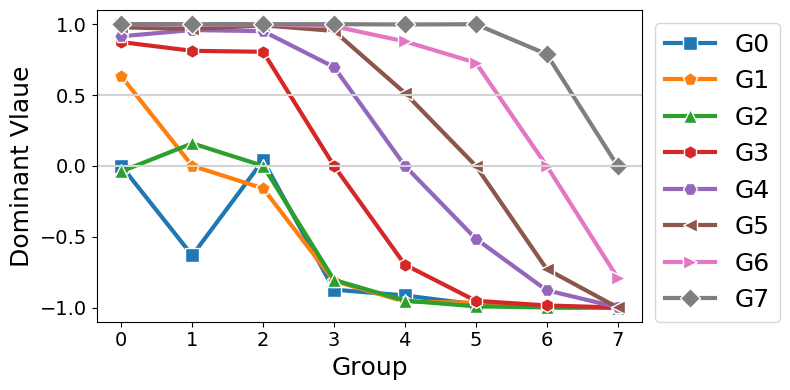

In [277]:
import matplotlib.pyplot as plt
# information transfer ratio
# Information audience ratio
plt.style.use('default')
font1 = {
    'weight': 'normal',
    'size': 18
}
markers = ['s', 'p', '^', 'h', 'H', '<', '>', 'D']
def transfer(gid):
    info_flow_ratios = []
    for i in range(8):
        info_flow_ratios.append(info_flow_ratio(gid, i))
    return info_flow_ratios
plt.figure(figsize=(8,4))
for gid in range(8):
    plt.plot(transfer(gid), marker=markers[gid], linewidth=3, markersize=10, markeredgecolor='white', label='G'+str(gid))
plt.tick_params(labelsize=14)
plt.axhline(y=0, color='lightgrey')
plt.axhline(y=0.5, color='lightgrey')
plt.xlabel('Group', font1)
plt.ylabel('Dominant Vlaue', font1)
plt.legend(bbox_to_anchor=(1,1), prop=font1)
plt.tight_layout()
plt.savefig('images/dominant_value.pdf')
plt.savefig('images/dominant_value.jpg', dpi=600)
plt.show()

In [278]:
corr = pd.DataFrame([transfer(0), transfer(1), transfer(2), transfer(3), 
                     transfer(4), transfer(5), transfer(6), transfer(7)])
corr.to_csv('data/information_transfor_update.csv')

In [279]:
corr

,0,1,2,3,4,5,6,7
0,0.000000,-0.632038,0.039213,-0.873593,-0.914652,-0.977713,-0.999402,-1.000000
1,0.632038,0.000000,-0.158848,-0.811819,-0.958479,-0.965660,-0.995567,-1.000000
2,-0.039213,0.158848,0.000000,-0.805104,-0.950574,-0.991524,-0.998771,-0.999843
3,0.873593,0.811819,0.805104,0.000000,-0.697266,-0.952401,-0.985160,-0.999844
4,0.914652,0.958479,0.950574,0.697266,0.000000,-0.514223,-0.878088,-0.997766
5,0.977713,0.965660,0.991524,0.952401,0.514223,0.000000,-0.728057,-0.999545
6,0.999402,0.995567,0.998771,0.985160,0.878088,0.728057,0.000000,-0.788675
7,1.000000,1.000000,0.999843,0.999844,0.997766,0.999545,0.788675,0.000000


In [280]:
transfer(0)

[0.0,
 -0.6320383619220035,
 0.03921250931111823,
 -0.8735927966003953,
 -0.9146524581162192,
 -0.977713117761211,
 -0.999402407811371,
 -1.0]

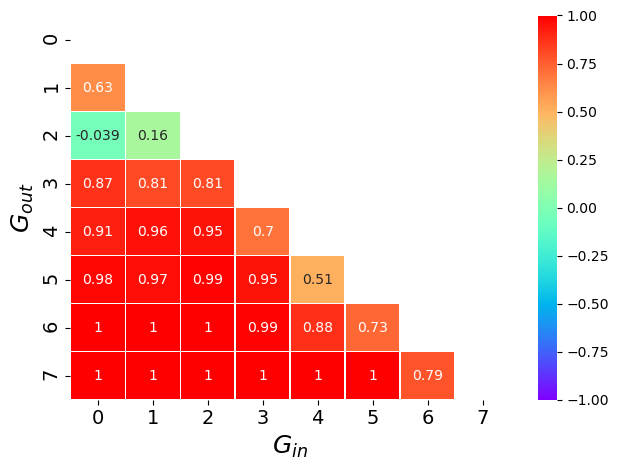

In [299]:
import seaborn as sns

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot = True, cmap='rainbow', linewidths=0.5)
plt.xlabel('$G_{in}$', font1)
plt.ylabel('$G_{out}$', font1)
plt.tick_params(labelsize=14)
plt.tight_layout()
plt.savefig('images/dominant_hmap.pdf')
plt.savefig('images/dominant_hmap.jpg', dpi=600)
plt.show()

In [173]:
findall_edge(true_news['edges'][1], patt_edge)

,target,source,s_userid,poster_id
0,3658686746755393,3656813583185243,1791353831,3880085981
1,3656813864290381,3656813583185243,1791353831,1098289271


In [10]:
user_info_fake['label'] = 'L_user'
user_info_fake['label'][user_info_fake['followers_count']>=1000] = 'H_user'

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
from collections import Counter
Counter(user_info_fake['label'])

Counter({'H_user': 144005, 'L_user': 1043922})

In [13]:
fake_news = fake_news.drop('Unnamed: 0', axis=1)

In [18]:
def L_user_ratio(edges, uid):
    sou_tar = findall_edge(edges, patt_edge)
    sou_tar['poster_id'] = sou_tar['poster_id'].apply(lambda s: int(s))
    merge_data = pd.merge(sou_tar, user_info_fake, left_on='poster_id', right_on='id')
    c_dict = dict(Counter(merge_data['label']))
    user_dict = {'L_user':0, 'H_user':0}
    for key in c_dict.keys():
        user_dict[key] = c_dict[key]
    if user_info_fake['followers_count'][user_info_fake['id']==uid].get_values()[0] >= 1000:
        user_dict['H_user'] += 1
    else:
        user_dict['L_user'] += 1
    return user_dict['L_user']/(user_dict['L_user']+user_dict['H_user'])
fake_news['L_user_ratio'] = fake_news.apply(lambda f: L_user_ratio(f['edges'], f['id']), axis=1)

In [16]:
LHF_L = fake_news['L_user_ratio'][fake_news['followers_count']<1000][fake_news['repostNum']>=10].describe()

In [20]:
fake_news['L_user_ratio'][fake_news['followers_count']>=1000][fake_news['repostNum']<10].describe()

count    3513.000000
mean        0.266314
std         0.313459
min         0.000000
25%         0.000000
50%         0.000000
75%         0.500000
max         0.900000
Name: L_user_ratio, dtype: float64

In [17]:
HHF_L = fake_news['L_user_ratio'][fake_news['followers_count']>=1000][fake_news['repostNum']>=10].describe()

In [22]:
fake_news['L_user_ratio'][fake_news['followers_count']<1000][fake_news['repostNum']<10].describe()

count    12805.000000
mean         0.979383
std          0.091016
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: L_user_ratio, dtype: float64

In [18]:
from scipy.stats import ks_2samp
ks_2samp(LHF_L, HHF_L)

Ks_2sampResult(statistic=0.25, pvalue=0.98010878010878)

In [23]:
fake_news['L_user_ratio'].describe()

count    22479.000000
mean         0.817082
std          0.297248
min          0.000000
25%          0.750000
50%          1.000000
75%          1.000000
max          1.000000
Name: L_user_ratio, dtype: float64

In [24]:
fake_news.to_csv('data/fake_news_L_ratio.csv', index=False)

# 网络节点和边获取

In [1]:
import pandas as pd
import numpy as np

news = pd.read_csv('data/struc_virality_net.csv')
true_news = news[news['label']=='true']
fake_news = pd.read_csv('data/fake_news_L_ratio.csv')

In [219]:
def nodes_info(wid):
    edges = fake_news['edges'][fake_news['weiboID']==wid].get_values()[0]
    uid = fake_news['id'][fake_news['weiboID']==wid]
    sou_tar = findall_edge(edges, patt_edge)
    sou_tar['poster_id'] = sou_tar['poster_id'].apply(lambda s: int(s))
    merge_data = pd.merge(sou_tar, user_info_fake, left_on='poster_id', right_on='id')
    return merge_data

In [2]:
true_news.sort_values(['struc_virality'], ascending=False).head()

,Unnamed: 0,authorDic,edges,keyUser,layerNum,rpsttimeline,status,weiboID,repost_user_ids,id,struc_virality,repostNum,label,struc_varility_net
7561,7561,"{'province': '37', 'weiboText': '孔子后裔，由家老二，母亲为...",{'3688064088376407': {'posttime': 'Fri Mar 14 ...,{'3875428303031304': 'http://tva4.sinaimg.cn/c...,"[11, 15, 9, 10, 6, 50]","[['2014-02-27 15:50:00', 1], ['2014-02-27 16:0...",1,3682617154629867,"['1820146213', '1820146213', '1810813871', '28...",2452301445,7.142302,101,true,7.142302
8935,8935,"{'province': '36', 'weiboText': '冬已来临，红军长征首战之地...",{'3649638400238080': {'posttime': 'Thu Nov 28 ...,{'3875428303031304': 'http://tva4.sinaimg.cn/c...,"[28, 18, 13, 12, 41, 27]","[['2013-11-22 23:40:00', 1], ['2013-11-22 23:5...",1,3647582574162746,"['1870373790', '2919454934', '3044894654', '29...",1870373790,6.570401,139,true,6.570401
6427,6427,"{'province': '36', 'weiboText': '冬已来临，红军长征首战之地...",{'3649638400238080': {'posttime': 'Thu Nov 28 ...,{'3875428303031304': 'http://tva4.sinaimg.cn/c...,"[37, 17, 13, 33, 12, 27]","[['2013-11-22 23:40:00', 1], ['2013-11-22 23:5...",1,3647582574162746,"['1870373790', '2919454934', '3044894654', '29...",1870373790,6.005961,139,true,6.005961
1780,1780,"{'province': '31', 'weiboText': '——颜真卿《天下第二行书—...",{'3631910171357185': {'posttime': 'Thu Oct 10 ...,{'3875428303031304': 'http://tva4.sinaimg.cn/c...,"[98, 123, 96, 61, 17, 132]","[['2013-07-09 06:50:00', 3], ['2013-07-09 07:0...",1,3598044794455087,"['2332298854', '1606865154', '3160826872', '29...",2178771271,5.858181,527,true,5.858181
9890,9890,"{'province': '31', 'weiboText': '【又一个朝鲜外交官投韩！从...",{'4011301396623360': {'posttime': 'Mon Aug 22 ...,{'4010120209906916': 'http://tva3.sinaimg.cn/c...,"[211, 140, 58, 138, 51, 201]","[['2016-08-19 22:40:00', 6], ['2016-08-19 22:5...",1,4010318348420992,"['5279755287', '1863597013', '5949888325', '19...",1926909715,5.762603,799,true,5.762603


In [11]:
fake_news.sort_values(['struc_virality'], ascending=False).head(20)

,authorDic,edges,keyUser,layerNum,rpsttimeline,status,weiboID,repost_user_ids,id,struc_virality,repostNum,label,struc_varility_net,friends_count,followers_count,gender,L_user_ratio
14724,"{'province': '44', 'weiboText': '中国的红十字会啊', 's...",{'3570016064722944': {'posttime': 'Mon Apr 22 ...,{'3707588698482624': 'http://tva3.sinaimg.cn/c...,"[45, 26, 23, 25, 18, 69]","[['2013-04-22 13:20:00', 0], ['2013-04-22 13:3...",1,3569876888998921,"['1783979633', '1777008171', '1464872853', '17...",1401401141,9.894752,206,fake,9.894752,105,246,m,0.932367
21691,"{'province': '51', 'weiboText': '小日本拍的《贞子》3D将于...",{'3487232868556800': {'posttime': 'Thu Sep 06 ...,{'3569253246296466': 'http://tva4.sinaimg.cn/c...,"[110, 57, 42, 24, 18, 94]","[['2012-09-05 09:00:00', 0], ['2012-09-05 09:1...",1,3486823567383831,"['2820237402', '2477348861', '1410465107', '17...",2866275992,9.028818,345,fake,9.028818,2481,231845,m,0.476879
21067,"{'province': '31', 'weiboText': '家乐福发生突发事件，营业时...",{'3522113980067840': {'posttime': 'Tue Dec 11 ...,{'3716316936524173': 'http://tp2.sinaimg.cn/25...,"[314, 236, 108, 92, 70, 323]","[['2012-12-11 14:40:00', 0], ['2012-12-11 14:5...",1,3522062138528886,"['1729344570', '1905834601', '1959098991', '18...",2548683090,8.860115,1143,fake,8.860115,191,150,m,0.836879
19396,"{'province': '81', 'weiboText': '兰州拉面不能吃了！南京电视...",{'3692051457887232': {'posttime': 'Tue Mar 25 ...,{'3716316936524173': 'http://tp2.sinaimg.cn/25...,"[91, 62, 49, 64, 51, 551]","[['2014-03-24 23:20:00', 15], ['2014-03-24 23:...",1,3691788764481838,"['2790788073', '1785341924', '1656348941', '33...",2790788073,8.546669,868,fake,8.546669,1942,2878,m,0.322093
17085,"{'province': '400', 'weiboText': '[吃惊] 21日中午12...",{'3536989271977986': {'posttime': 'Mon Jan 21 ...,{'3707588698482624': 'http://tva3.sinaimg.cn/c...,"[39, 28, 17, 12, 14, 68]","[['2013-01-21 17:00:00', 1], ['2013-01-21 17:1...",1,3536955071341823,"['1654229223', '1806308760', '1802672284', '29...",1405070292,8.521625,178,fake,8.521625,1614,466,m,0.787709
21163,"{'province': '65', 'weiboText': '这个小女孩是维吾尔族，五岁...",{'3515834687414273': {'posttime': 'Sat Nov 24 ...,{'3569253246296466': 'http://tva4.sinaimg.cn/c...,"[753, 403, 147, 102, 38, 409]","[['2012-11-23 18:40:00', 3], ['2012-11-23 18:5...",1,3515599471078260,"['2118159847', '2920070154', '1990690071', '17...",2374897285,8.460518,1852,fake,8.460518,2103,27317,m,0.725938
20991,"{'province': '11', 'weiboText': '@邓飞 先生，您好！有网友...",{'3528716741429248': {'posttime': 'Sat Dec 29 ...,{'3716316936524173': 'http://tp2.sinaimg.cn/25...,"[95, 48, 21, 11, 8, 63]","[['2012-12-28 17:20:00', 0], ['2012-12-28 17:3...",1,3528263013563152,"['2479671597', '1742411904', '1213622733', '16...",1813610770,8.426977,246,fake,8.426977,433,35504,m,0.303644
20181,"{'province': '31', 'weiboText': '中国的同胞们：中国电影《金...",{'3571607907788804': {'posttime': 'Sat Apr 27 ...,{'3716316936524173': 'http://tp2.sinaimg.cn/25...,"[81, 52, 24, 29, 28, 128]","[['2013-04-26 22:20:00', 0], ['2013-04-26 22:3...",1,3571462713599109,"['1653083140', '2789617421', '3196541343', '18...",2789617421,8.346683,342,fake,8.346683,2000,4481,m,0.459064
21045,"{'province': '44', 'weiboText': '家乐福发生突发事件，营业时...",{'3522742156166660': {'posttime': 'Thu Dec 13 ...,{'3716316936524173': 'http://tp2.sinaimg.cn/25...,"[15, 12, 13, 5, 4, 47]","[['2012-12-12 10:10:00', 0], ['2012-12-12 10:2...",1,3522354544438062,"['1768848134', '1834678821', '1919631044', '21...",2003958985,8.198883,96,fake,8.198883,542,145,f,0.958763
21500,"{'province': '21', 'weiboText': '世界上最恶劣的村民 就在中...",{'3494197837744128': {'posttime': 'Tue Sep 25 ...,{'3569253246296466': 'http://tva4.sinaimg.cn/c...,"[170, 101, 77, 62, 43, 180]","[['2012-09-23 12:40:00', 1], ['2012-09-23 12:5...",1,3493401536294919,"['2127797411', '1998919983', '2203545154', '17...",1238019837,8.192414,633,fake,8.192414,1337,12230,m,0.655008


In [ ]:
true_news[true_news['struc_virality']<2].sort_values(['repostNum'], ascending=False).head()

In [ ]:
fake_news[fake_news['struc_virality']<2].sort_values(['repostNum'], ascending=False).head()

In [226]:
nodes_info_id = nodes_info(3475917323802680)
nodes_info_id['id'] = nodes_info_id['target']
nodes_info_id.to_csv('data/nodes_info_3475917323802680.csv', index=False)

In [10]:
true_edges = findall_edge(true_news.loc[7561, 'edges'], patt_edge)
true_edges.to_csv('data/true_edges_3682617154629867.csv', index=False)

In [11]:
fake_edges = findall_edge(fake_news.loc[24724, 'edges'], patt_edge)
fake_edges.to_csv('data/fake_edges_3569876888998921.csv', index=False)

In [13]:
true_edges = findall_edge(true_news.loc[9890, 'edges'], patt_edge)
true_edges.to_csv('data/true_edges_4010318348420992.csv', index=False)

In [32]:
fake_edges = findall_edge(fake_news.loc[31691, 'edges'], patt_edge)
fake_edges.to_csv('data/fake_edges_3486823567383831.csv', index=False)

In [26]:
true_edges = findall_edge(true_news.loc[7493, 'edges'], patt_edge)
true_edges.to_csv('data/true_edges_3913779509422777_broadcast.csv', index=False)

In [34]:
fake_edges = findall_edge(fake_news.loc[30578, 'edges'], patt_edge)
fake_edges.to_csv('data/fake_edges_3554114233283397.csv', index=False)

In [15]:
fake_news['authorDic'][fake_news['weiboID']==3554114233283397].get_values()

array(["{'province': '11', 'weiboText': '人性已经崩溃到最低点了，婴儿大家都听过，但是婴儿汤我估计没有几个人听过，有一些畜生在骇人听闻的在烹制这种婴儿汤，据说很能补气养血，又能补阳气，有人烹制就有人品尝，我不知道你怎么能吃的下去，难道都不怕吃死你吗？希望你补一补你的人性吧。', 'screen_name': '官邸顾问', 'friends_count': 460, 'gender': 'f', 'repostNum': 996, 'weiboURL': 'http://weibo.com/2711326375/zmHL1dMa1', 'followers_count': 2444, 'img_url': 'http://tva2.sinaimg.cn/crop.44.94.236.236.50/a19b8ea7jw8etpfajghfrj20920btaau.jpg', 'id': 2711326375}"],
      dtype=object)

In [230]:
fake_news[fake_news['weiboID']==3569876888998921]

,authorDic,edges,keyUser,layerNum,rpsttimeline,status,weiboID,repost_user_ids,id,struc_virality,repostNum,label,friends_count,followers_count,gender,L_user_ratio
24724,"{'province': '44', 'weiboText': '中国的红十字会啊', 's...",{'3570016064722944': {'posttime': 'Mon Apr 22 ...,{'3707588698482624': 'http://tva3.sinaimg.cn/c...,"[45, 26, 23, 25, 18, 69]","[['2013-04-22 13:20:00', 0], ['2013-04-22 13:3...",1,3569876888998921,"['1783979633', '1777008171', '1464872853', '17...",1401401141,9.894752,206,fake,105,246,m,0.932367


In [14]:
fake_news[fake_news['weiboID']==3554114233283397]

,authorDic,edges,keyUser,layerNum,rpsttimeline,status,weiboID,repost_user_ids,id,struc_virality,repostNum,label,struc_varility_net,friends_count,followers_count,gender,L_user_ratio
20578,"{'province': '11', 'weiboText': '人性已经崩溃到最低点了，婴...",{'3554271310563331': {'posttime': 'Sun Mar 10 ...,{'3716316936524173': 'http://tp2.sinaimg.cn/25...,"[330, 183, 92, 53, 41, 297]","[['2013-03-10 01:30:00', 3], ['2013-03-10 01:4...",1,3554114233283397,"['1610383232', '2689735804', '2980206731', '16...",2711326375,7.74812,996,fake,7.74812,460,2444,f,0.564206


In [232]:
fake_news[fake_news['weiboID']==3486823567383831]

,authorDic,edges,keyUser,layerNum,rpsttimeline,status,weiboID,repost_user_ids,id,struc_virality,repostNum,label,friends_count,followers_count,gender,L_user_ratio
31691,"{'province': '51', 'weiboText': '小日本拍的《贞子》3D将于...",{'3487232868556800': {'posttime': 'Thu Sep 06 ...,{'3569253246296466': 'http://tva4.sinaimg.cn/c...,"[110, 57, 42, 24, 18, 94]","[['2012-09-05 09:00:00', 0], ['2012-09-05 09:1...",1,3486823567383831,"['2820237402', '2477348861', '1410465107', '17...",2866275992,9.028818,345,fake,2481,231845,m,0.476879


In [12]:
true_news['authorDic'][true_news['weiboID']==4010318348420992].get_values()

array(["{'province': '31', 'weiboText': '【又一个朝鲜外交官投韩！从俄罗斯偕妻率子走人】据俄罗斯圣彼得堡媒体7月8日报道，一位名叫金哲森的朝鲜驻俄外交官在俄罗斯失踪。据推测，他可能向西在欧洲国家寻求政治庇护。而据香港媒体今日报道，销声匿迹的金哲森最近已偕妻率子选择投奔韩国。据报，金哲森一家比朝鲜驻英国公使太勇浩一家还要早抵...全文： http://m.weibo.cn/1926909715/4010318348420992', 'screen_name': '第一财经日报', 'friends_count': 1954, 'gender': 'm', 'repostNum': 799, 'weiboURL': 'http://weibo.com/1926909715/E4kquzkGs', 'followers_count': 8479187, 'img_url': 'http://tva3.sinaimg.cn/crop.6.4.171.171.50/72da4f13gw1eme45dusx1j2050050q34.jpg', 'id': 1926909715}"],
      dtype=object)

In [11]:
fake_news[fake_news['weiboID']==3475917323802680]

,authorDic,edges,keyUser,layerNum,rpsttimeline,status,weiboID,repost_user_ids,id,struc_virality,repostNum,label,struc_varility_net,friends_count,followers_count,gender,L_user_ratio
22213,"{'province': '31', 'weiboText': '如果刘翔得了伦敦奥运会金牌...",{'3490938800410624': {'posttime': 'Sun Sep 16 ...,{'3716316936524173': 'http://tp2.sinaimg.cn/25...,"[599, 0, 0, 0, 0, 0]","[['2012-08-06 06:40:00', 0], ['2012-08-06 06:5...",1,3475917323802680,"['2920384552', '2810808890', '2789931002', '28...",2723632641,1.996667,599,fake,1.996667,768,71834,f,0.998319
